# Bayesian Networks: Monty Hall Example

A [GraViz installation](https://graphviz.org/download/) is needed to view the graphic outputs in this notebook

In [70]:
import numpy as np
import pandas as pd
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import util.extensions

%matplotlib inline 

> You are on a game show, being asked to choose between three doors.
> Behind each door, there is either a price or nothing. You choose a door.
> The host called Monty Hall picks one of the other doors, which he knows
> has nothing behind it, and opens it, showing you the emptiness. You
> know by the rules of the game that Monty will always reveal an empty
> door. Monty then asks whether you would like to switch your choice of
> door to the other remaining door. Do you choose to switch or not?

In [71]:
bn = gum.loadBN("data/monty_hall.net")

## Define Random Variables

In [72]:
P = bn.nodeId(bn.variableFromName("Prize"))
C = bn.nodeId(bn.variableFromName("FirstSelection"))
M = bn.nodeId(bn.variableFromName("MontyOpens"))

## Display Bayesian Network

In [73]:
print(bn)

BN{nodes: 3, arcs: 2, domainSize: 27, dim: 33}


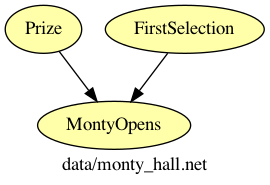

In [74]:
bn.display()

In [75]:
bn.display_tables()

## Inference

In [76]:
# Enables exact inference
ie = gum.LazyPropagation(bn)

### 1/ Global Probability Distribution

It follows from the Bayesian network structure that

$p(P, C, M) = p(M|P,C) \cdot p(P) \cdot p(C)$

Note, calculating the global distribution takes exponential time and space - do not do this for larger examples!

In [77]:
target = {P, C, M}
ie.addJointTarget(target)

ie.makeInference()
glob = ie.jointPosterior(target)

glob

(gum::Potential<double>@0x7fa72a577d30) <Prize:Door 1|FirstSelection:Door 1|MontyOpens:Door 1> :: 0 /<Prize:Door 2|FirstSelection:Door 1|MontyOpens:Door 1> :: 0 /<Prize:Door 3|FirstSelection:Door 1|MontyOpens:Door 1> :: 0 /<Prize:Door 1|FirstSelection:Door 2|MontyOpens:Door 1> :: 0 /<Prize:Door 2|FirstSelection:Door 2|MontyOpens:Door 1> :: 0.0555556 /<Prize:Door 3|FirstSelection:Door 2|MontyOpens:Door 1> :: 0.111111 /<Prize:Door 1|FirstSelection:Door 3|MontyOpens:Door 1> :: 0 /<Prize:Door 2|FirstSelection:Door 3|MontyOpens:Door 1> :: 0.111111 /<Prize:Door 3|FirstSelection:Door 3|MontyOpens:Door 1> :: 0.0555556 /<Prize:Door 1|FirstSelection:Door 1|MontyOpens:Door 2> :: 0.0555556 /<Prize:Door 2|FirstSelection:Door 1|MontyOpens:Door 2> :: 0 /<Prize:Door 3|FirstSelection:Door 1|MontyOpens:Door 2> :: 0.111111 /<Prize:Door 1|FirstSelection:Door 2|MontyOpens:Door 2> :: 0 /<Prize:Door 2|FirstSelection:Door 2|MontyOpens:Door 2> :: 0 /<Prize:Door 3|FirstSelection:Door 2|MontyOpens:Door 2> :: 0 /<Prize:Door 1|FirstSelection:Door 3|MontyOpens:Door 2> :: 0.111111 /<Prize:Door 2|FirstSelection:Door 3|MontyOpens:Door 2> :: 0 /<Prize:Door 3|FirstSelection:Door 3|MontyOpens:Door 2> :: 0.0555556 /<Prize:Door 1|FirstSelection:Door 1|MontyOpens:Door 3> :: 0.0555556 /<Prize:Door 2|FirstSelection:Door 1|MontyOpens:Door 3> :: 0.111111 /<Prize:Door 3|FirstSelection:Door 1|MontyOpens:Door 3> :: 0 /<Prize:Door 1|FirstSelection:Door 2|MontyOpens:Door 3> :: 0.111111 /<Prize:Door 2|FirstSelection:Door 2|MontyOpens:Door 3> :: 0.0555556 /<Prize:Door 3|FirstSelection:Door 2|MontyOpens:Door 3> :: 0 /<Prize:Door 1|FirstSelection:Door 3|MontyOpens:Door 3> :: 0 /<Prize:Door 2|FirstSelection:Door 3|MontyOpens:Door 3> :: 0 /<Prize:Door 3|FirstSelection:Door 3|MontyOpens:Door 3> :: 0

### 3/ Conditional Distribution

Calculate the probability for the prize location given that we initially select door 2 and Monty opens door 3. Note
* 0 : door 1
* 1 : door 2
* 2 : door 3
Consequently, $p(C = 1)$ denotes the probability that our first selection is door 2.

$p(P | C = 1, M = 2) = 
\frac{p(P, C = 1, M = 2)}{p(C = 1, M = 2)} =
\frac{p(P, C = 1, M = 2)}{\sum_{P} p(P, C = 1, M = 2)}$

In [78]:
target = P
ie.addTarget(target)
ie.setEvidence({'FirstSelection' : 1, 'MontyOpens' : 2}) # Select door 2, monty opens 3
ie.makeInference()
ie.posterior(target)

(gum::Potential<double>@0x7fa730622840) <Prize:Door 1> :: 0.666667 /<Prize:Door 2> :: 0.333333 /<Prize:Door 3> :: 0

Let us verify this result by hand: It follows from the Bayesian network structure that

$p(P = 0 | C = 1, M = 2) = 
\frac{p(P = 0, C = 1, M = 2)}{p(C = 1, M = 2)} =
\frac{p(P = 0, C = 1, M = 2)}{\sum_{P} p(P, C = 1, M = 2)} =
\frac{p(M = 2 | P = 0, C = 1) \cdot p(P = 0) \cdot p(C = 1)}{\sum_{P} p(M = 2|P,C = 1) \cdot p(P) \cdot p(C = 1)}$

In [79]:
numerator = (1 * 0.3333 * 0.3333)
print("numerator:\t {:.6f}".format(numerator))

denominator = (1.0 * 0.3333 * 0.3333 +
               0.5 * 0.3333 * 0.3333 +
               0.0 * 0.3333 * 0.3333)
               
print("denominator:\t {:.6f}".format(denominator))

result = numerator / denominator

# Compare visually
print("result:\t\t {:.6f}".format(result))

# Compare automatically
assert np.isclose(result, ie.posterior(P)[0])

numerator:	 0.111089
denominator:	 0.166633
result:		 0.666667


We can display the effect of C = 1 and M = 2 on all variables.

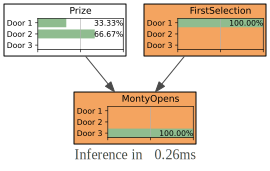

In [80]:
gnb.showInference(bn, evs={'FirstSelection' : 0, 'MontyOpens' : 2}) # Select door 1, monty opens 3

Finally, we could calculate the distribution $p(P|C, M)$ and look up the conditional we are interested in

$p(P|C, M) = \frac{p(P, C, M)}{p(C, M)}$

In [81]:
ie.eraseAllEvidence()

ie.addJointTarget({P, C, M})
ie.addJointTarget({C, M})

ie.makeInference()

numinator   = ie.jointPosterior({P, C, M})
denuminator = ie.jointPosterior({C, M})

numinator / denuminator

(gum::Potential<double>@0x7fa7302ec750) <FirstSelection:Door 1|MontyOpens:Door 1|Prize:Door 1> :: nan /<FirstSelection:Door 2|MontyOpens:Door 1|Prize:Door 1> :: 0 /<FirstSelection:Door 3|MontyOpens:Door 1|Prize:Door 1> :: 0 /<FirstSelection:Door 1|MontyOpens:Door 2|Prize:Door 1> :: 0.333333 /<FirstSelection:Door 2|MontyOpens:Door 2|Prize:Door 1> :: nan /<FirstSelection:Door 3|MontyOpens:Door 2|Prize:Door 1> :: 0.666667 /<FirstSelection:Door 1|MontyOpens:Door 3|Prize:Door 1> :: 0.333333 /<FirstSelection:Door 2|MontyOpens:Door 3|Prize:Door 1> :: 0.666667 /<FirstSelection:Door 3|MontyOpens:Door 3|Prize:Door 1> :: nan /<FirstSelection:Door 1|MontyOpens:Door 1|Prize:Door 2> :: nan /<FirstSelection:Door 2|MontyOpens:Door 1|Prize:Door 2> :: 0.333333 /<FirstSelection:Door 3|MontyOpens:Door 1|Prize:Door 2> :: 0.666667 /<FirstSelection:Door 1|MontyOpens:Door 2|Prize:Door 2> :: 0 /<FirstSelection:Door 2|MontyOpens:Door 2|Prize:Door 2> :: nan /<FirstSelection:Door 3|MontyOpens:Door 2|Prize:Door 2> :: 0 /<FirstSelection:Door 1|MontyOpens:Door 3|Prize:Door 2> :: 0.666667 /<FirstSelection:Door 2|MontyOpens:Door 3|Prize:Door 2> :: 0.333333 /<FirstSelection:Door 3|MontyOpens:Door 3|Prize:Door 2> :: nan /<FirstSelection:Door 1|MontyOpens:Door 1|Prize:Door 3> :: nan /<FirstSelection:Door 2|MontyOpens:Door 1|Prize:Door 3> :: 0.666667 /<FirstSelection:Door 3|MontyOpens:Door 1|Prize:Door 3> :: 0.333333 /<FirstSelection:Door 1|MontyOpens:Door 2|Prize:Door 3> :: 0.666667 /<FirstSelection:Door 2|MontyOpens:Door 2|Prize:Door 3> :: nan /<FirstSelection:Door 3|MontyOpens:Door 2|Prize:Door 3> :: 0.333333 /<FirstSelection:Door 1|MontyOpens:Door 3|Prize:Door 3> :: 0 /<FirstSelection:Door 2|MontyOpens:Door 3|Prize:Door 3> :: 0 /<FirstSelection:Door 3|MontyOpens:Door 3|Prize:Door 3> :: nan

Conclusively we must always switch doors in the present case, since it maximizes the probability of winning. Note also that the nan entries are due to the game rules. Monty must not open the door that we selected.